In [1]:
import pathlib
import numpy as np
import fitz
import matplotlib.pyplot as plt
import io
from PIL import Image
from scipy import sparse

In [2]:
def display_thetas(thetas_img):
    pdf_document = fitz.open(thetas_img)
    print(thetas_img)
    page = pdf_document.load_page(0)
    pix = page.get_pixmap()
    image = Image.open(io.BytesIO(pix.tobytes()))

    plt.figure(figsize=(8, 11))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [40]:
mallet_path = "/export/usuarios_ml4ds/lbartolome/Repos/umd/theta-evaluation/data/models/trained/mallet_wiki_50"
tomotopy_path = "/export/usuarios_ml4ds/lbartolome/Repos/umd/theta-evaluation/data/models/trained/tomotopy_wiki_50"

## Mallet 

In [41]:
thetas = sparse.load_npz(pathlib.Path(mallet_path).joinpath(f"thetas.npz")).toarray()
alphas_mallet = np.asarray(np.mean(thetas, axis=0)).ravel()

In [42]:
with (pathlib.Path(mallet_path) / "tpc_descriptions.txt").open('r', encoding='utf8') as fin:
    tpc_descriptions = [el.strip() for el in fin.readlines()]
    for tpc, keys in enumerate(tpc_descriptions):
        print(f"Topic {tpc}: {keys}")

Topic 0: water area river lake miles park feet island land south years creek mountain north sea
Topic 1: station line railway bridge trains service construction built services train stations opened tunnel london class
Topic 2: ride car train park coaster speed roller track cars riders hill vehicle feet vehicles turn
Topic 3: character story man time life scene death find felt plot people father good end day
Topic 4: war battalion division brigade training regiment units command unit german world military commander japanese service
Topic 5: game player games players released version gameplay video series development release time characters character team
Topic 6: race lap oxford cambridge time car lead place drivers position points team races ahead championship
Topic 7: species shark found long small large body birds females eggs prey sharks males fish water
Topic 8: castle king century england english scotland london henry royal sir lord scottish wales son early
Topic 9: species cap fr

/export/usuarios_ml4ds/lbartolome/Repos/umd/theta-evaluation/data/models/trained/mallet_wiki_50/thetasDist.pdf


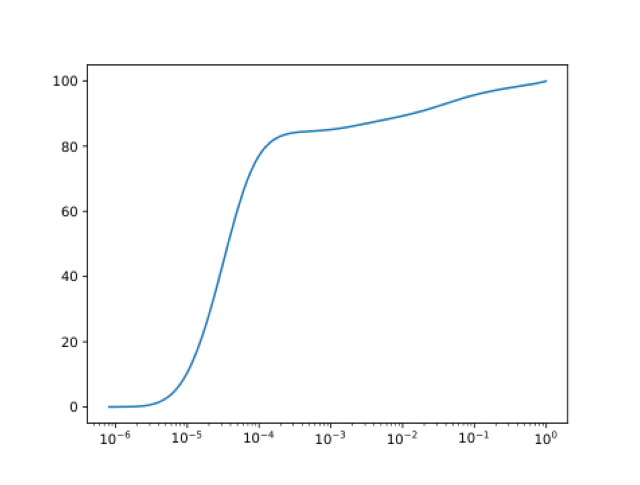

In [43]:
display_thetas((pathlib.Path(mallet_path) / "thetasDist.pdf"))

## Tomotopy

In [44]:
thetast = sparse.load_npz(pathlib.Path(tomotopy_path).joinpath(f"thetas.npz")).toarray()
alphas_tomo = np.asarray(np.mean(thetast, axis=0)).ravel()

In [45]:
with (pathlib.Path(tomotopy_path) / "tpc_descriptions.txt").open('r', encoding='utf8') as fin:
    tpc_descriptions = [el.strip() for el in fin.readlines()]
    for tpc, keys in enumerate(tpc_descriptions):
        print(f"Topic {tpc}: {keys}")

Topic 0: horse horses jack smith liz tracy frank fey rock jenna riding kenneth year old stud
Topic 1: australia match runs test innings england cricket team wickets scored australian took second matches played
Topic 2: church god christian religious temple christ jesus religion century according faith holy known day text
Topic 3: book published work works wrote poem story writing written art books stories history author novel
Topic 4: ship guns ships tons class long war inch gun mph torpedo knots speed deck main
Topic 5: series released characters story japanese japan original soundtrack music character release comic theme animation manga
Topic 6: station line railway bridge trains service new construction train stations built services opened tunnel rail
Topic 7: season game games home league runs baseball team hit career series run played record year
Topic 8: film films role production million movie release released director cast best character actor filming script
Topic 9: battle bri

/export/usuarios_ml4ds/lbartolome/Repos/umd/theta-evaluation/data/models/trained/tomotopy_wiki_50/thetasDist.pdf


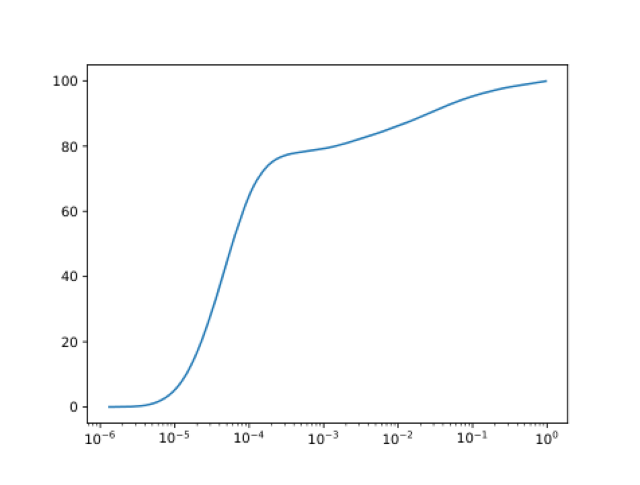

In [46]:
display_thetas((pathlib.Path(tomotopy_path) / "thetasDist.pdf"))

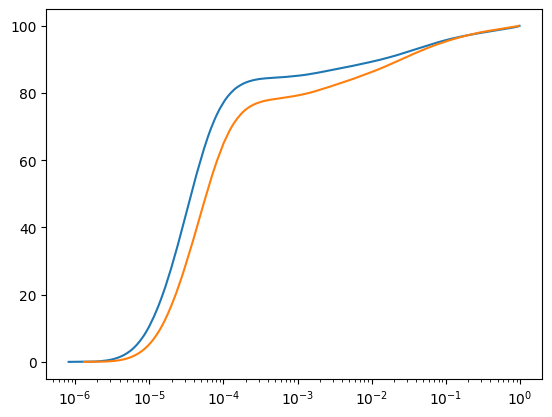

In [47]:
all_values = np.sort(thetas.flatten())
all_values2 = np.sort(thetast.flatten())
step = int(np.round(len(all_values) / 1000))
plt.semilogx(all_values[::step], (100 / len(all_values)) * np.arange(0, len(all_values))[::step])
plt.semilogx(all_values2[::step], (100 / len(all_values2)) * np.arange(0, len(all_values2))[::step])

## Aligning some topics

In [56]:
pairs = [
    (0,14),
    (1,41),
    (3,10),
    (6,1),
    (12,5),
    (18,39),
    (19,47),
    (27,19),
    (38,17),
    (33,4),
    (35,43),
    (38,49),
    (39,46),
    (46,0)
]

for pair in pairs:
    print(f"Topic {pair[0]} in Mallet: {alphas_mallet[pair[0]]} vs topic {pair[1]} in Tomotopy {alphas_tomo[pair[1]]}")

Topic 0 in Mallet: 0.020791232585906982 vs topic 14 in Tomotopy 0.018157510086894035
Topic 1 in Mallet: 0.018072424456477165 vs topic 41 in Tomotopy 0.017255110666155815
Topic 3 in Mallet: 0.037255965173244476 vs topic 10 in Tomotopy 0.009740267880260944
Topic 6 in Mallet: 0.019068770110607147 vs topic 1 in Tomotopy 0.007162649184465408
Topic 12 in Mallet: 0.011591661721467972 vs topic 5 in Tomotopy 0.012179495766758919
Topic 18 in Mallet: 0.013479126617312431 vs topic 39 in Tomotopy 0.015890683978796005
Topic 19 in Mallet: 0.017410384491086006 vs topic 47 in Tomotopy 0.009922104887664318
Topic 27 in Mallet: 0.015906279906630516 vs topic 19 in Tomotopy 0.012625795789062977
Topic 38 in Mallet: 0.01218324899673462 vs topic 17 in Tomotopy 0.02752840891480446
Topic 33 in Mallet: 0.019583646208047867 vs topic 4 in Tomotopy 0.038961127400398254
Topic 35 in Mallet: 0.022162973880767822 vs topic 43 in Tomotopy 0.018797380849719048
Topic 38 in Mallet: 0.01218324899673462 vs topic 49 in Tomotopy

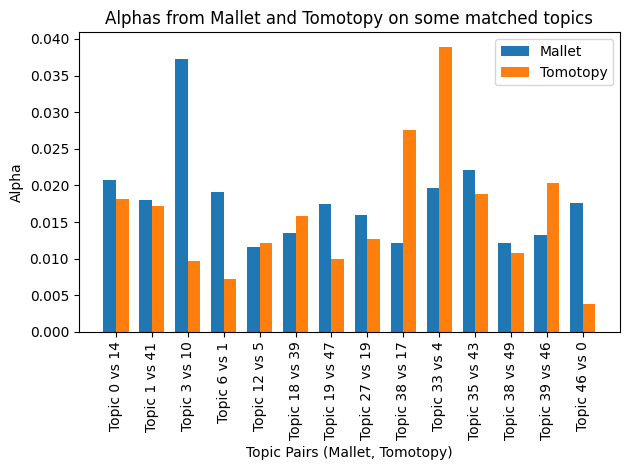

In [59]:
import matplotlib.pyplot as plt

# Extracting data for plotting
mallet_scores = [alphas_mallet[pair[0]] for pair in pairs]
tomo_scores = [alphas_tomo[pair[1]] for pair in pairs]
topics = [f"Topic {pair[0]} vs {pair[1]}" for pair in pairs]

# Plotting
x = range(len(pairs))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x, mallet_scores, width, label='Mallet')
ax.bar([p + width for p in x], tomo_scores, width, label='Tomotopy')

# Adding labels and title
ax.set_xlabel('Topic Pairs (Mallet, Tomotopy)')
ax.set_ylabel('Alpha')
ax.set_title('Alphas from Mallet and Tomotopy on some matched topics')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(topics, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()
